# Programming Assignment-5

---

## **Linear Regression and Gradient Descent**

**Objective:**

The objective of this assignment is to implement Linear Regression and Gradient Descent algorithms in python. For this assignment, we will use Boston housing dataset. The task is to predict the price of the house in the suburbs of Boston city, given the details of the property. After completing this assignment, you should be familiar with the following:

*   How to load the dataset in python?

*   How to normalize the dataset for better results?

*   How to split the dataset into training and testing set?

*   How to compute a RMSE between the predicted value and the actual value for the given data sample?

*   How to implement the Gradient Descent algorithm to learn the optimal parameters of linear regression from the training data?

*   How to apply linear regression algorithm to predict the housing price in Boston city for the new data using the above optimal parameters?


**Dataset:**

You can download the dataset from here: https://archive.ics.uci.edu/ml/machine-learning-databases/housing/. Each instance in this dataset describes the attributes of a housing property in Boston suburb and the task is to predict the house prices in thousands of dollars. There are 13 numerical attributes with varying scales describing the housing properties of suburbs. The readme file in the dataset provides details on the dataset. Read this file before implementing your algorithm to check whether you need to do any data preprocessing steps. The 13 attributes of each property and the housing price (in $1000's) are given as follows:
1. CRIM     : per capita crime rate by town
2. ZN       : proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS    : proportion of non-retail business acres per town
4. CHAS     : Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
5. NOX      : nitric oxides concentration (parts per 10 million)
6. RM       : average number of rooms per dwelling
7. AGE      : proportion of owner-occupied units built prior to 1940
8. DIS      : weighted distances to five Boston employment centres
9. RAD      : index of accessibility to radial highways
10. TAX     : full-value property-tax rate per \$10,000
11. PTRATIO : pupil-teacher ratio by town
12. B       : 1000 (Bk - 0.63) ^ 2 where Bk is the proportion of blacks by town
13. LSTAT   : % lower status of the population
14. MEDV    : Median value of owner-occupied homes in \$1000's

**Deliverables:**

*   This colab notebook with python codes

Total Marks: 30.
---


## **Q0. Download the Dataset:**

Before getting started, download the dataset from https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data and upload it to the `/content/` directory in the Colab environment.

##**Q1. Load the Dataset:** 

You need to implement this function to load the dataset from the `house.data` file and return the `dataset` numpy arrays. The 14 columns of the `dataset` correspond to the 13 attributes of housing property `X` and also the housing price value `y`. (3 marks)

In [ ]:
import numpy as np
import math

# to display the float numbers with 2 decimal points and supress the use of 
# scientific notations for small numbers
# np.set_printoptions(precision=2, suppress=True)

# function to load the wine dataset into dataset numpy arrays

def loadData(filename):
  '''
  filename: string, the path to the house.data file
  RETURN
    dataset: numpy array, shape = [N, 14]
  '''
  dataset = None
  ## start your code here
  lst = []
  with open(filename) as f:
    lines = f.readlines()
  for row in lines:
    innerlst = []
    string = ""
    for i in row:
      #print(i)
      if i != " ":
        string += i
      else:
        if string == "":
          continue
        innerlst.append((string))
        string = ""
    innerlst.append(string)
    lst.append(innerlst)

  dataset = np.array(lst, dtype=np.float64)

  ## end
  return dataset

When you run this code, you should get the expected output as shown below:


In [ ]:
#driver program to test the loadWineData() function
#Note that y should be the 14th attribute in X numpy array  

filename = "/content/housing.data" 
dataset = loadData(filename)

print(dataset.shape)
print(np.mean(dataset, axis=0))

(506, 14)
[3.61352356e+00 1.13636364e+01 1.11367787e+01 6.91699605e-02
 5.54695059e-01 6.28463439e+00 6.85749012e+01 3.79504269e+00
 9.54940711e+00 4.08237154e+02 1.84555336e+01 3.56674032e+02
 1.26530632e+01 2.25328063e+01]


Expected output:
```
(506, 14)
[3.61352356e+00 1.13636364e+01 1.11367787e+01 6.91699605e-02
 5.54695059e-01 6.28463439e+00 6.85749012e+01 3.79504269e+00
 9.54940711e+00 4.08237154e+02 1.84555336e+01 3.56674032e+02
 1.26530632e+01 2.25328063e+01]
```


##**Q2. Normalize Data:**

Code implementation: The function `normalize` normalizes only the housing attributes, i.e., the first 13 columns in the `dataset` numpy array. The 14th attribute (i.e., `y`) should remain unchanged. Ask yourself the question: "why do we normalize the housing attributes?" (3 marks)

Note: The implementation need not use for-loops, but we accept answers that include one or two for-loops.

In [ ]:
# code to normalize only the input features from 
# the dataset (i.e., first 13 attributes) and the output y (i.e., 14th attribute)
# remains unchanged

def normalize(dataset):
  '''
  The function that normalizes the first 13 attributes in the numpy array but leaves the 14th attributes unchanged
  dataset: numpy array, shape = [N, D]
  RETURN
    dataset_normalized, numpy array, shape = [N, D]
  '''
  dataset_normalized = np.copy(dataset)
  ## start your code here
  lst = np.array([])
  for i in range(13):
    col = dataset_normalized[:,i]
    max = np.max(col)
    min = np.min(col)
    col = (col - min) / (max-min)
    for j in range(len(col)):
      dataset_normalized[j][i] = col[j]

  ## end
  return dataset_normalized

dataset_normalized = normalize(dataset)
print(dataset_normalized.shape)
print(np.mean(dataset_normalized,axis=0))

(506, 14)
[ 0.0405441   0.11363636  0.39137752  0.06916996  0.34916679  0.52186901
  0.67636355  0.24238128  0.37171335  0.42220831  0.62292911  0.89856783
  0.30140903 22.53280632]


Expected output:
```
(506, 14)
[ 0.0405441   0.11363636  0.39137752  0.06916996  0.34916679  0.52186901
  0.67636355  0.24238128  0.37171335  0.42220831  0.62292911  0.89856783
  0.30140903 22.53280632]
```

## **Q3. Adding Bias**

Code implementation: The `addBias` function adds the bias input `1` to the first column of all the data samples (i.e., rows) in the dataset. (2 marks)

In [ ]:
def addBias(dataset):
  '''
  X: numpy array, shape = [N,D]
  RETURN
    XX: numpy array, shape = [N, D+1]
  '''
  dataset_ones = None
  dataset_ones = np.copy(dataset)
  dataset_ones = np.insert(dataset_ones, 0, 1, axis=1)

  ## end
  return dataset_ones

dataset_ones = addBias(dataset_normalized)
print(dataset_ones.shape)
print(dataset_ones[20])

(506, 15)
[ 1.          0.01399878  0.          0.28152493  0.          0.31481481
  0.38493964  0.98043254  0.24264111  0.13043478  0.22900763  0.89361702
  0.9487367   0.53228477 13.6       ]


Expected output:
```
(506, 15)
[ 1.          0.01399878  0.          0.28152493  0.          0.31481481
  0.38493964  0.98043254  0.24264111  0.13043478  0.22900763  0.89361702
  0.9487367   0.53228477 13.6       ]
```

##**Q4. Splitting Dataset:**

Code implementation: The `splitDataset` function splits the dataset into: 1) the training set for training the gradient descent algorithm; and 2) the testing set for evaluating the algorithm's performance. The training set should include the first 80% (i.e., first 404 rows) of the dataset and the testing set should include the remaining 20% of the dataset. The `splitDataset` function also splits the corresponding `y` attribute housing price from other attributes in the `dataset`, which will be used later as the output or target value. (3 marks)

In [ ]:
#insert the bias input input into X array

# Get Training (404) and Tesing (102) set
def splitDataset(dataset):
  '''
  dataset: numpy array, shape = [N, D]
  RETURN
    train_X: numpy array, shape = [int(N * 0.8), D]
    test_X: numpy array, shape = [N-int(N * 0.8), D]
    train_y: numpy array, shape = [int(N * 0.8), 1]
    test_y: numpy array, shape = [N-int(N * 0.8), 1]
  '''
  train_X, test_X = None, None
  train_y, test_y = None, None
  
  ## start your code here
  length = (len(dataset) // 5) * 4 # 4/5
  train = dataset[:length]
  test = dataset[length:]

  train_X = dataset[:length, :14]
  train_y = dataset[:length, 14]
  train_y = train_y.reshape(length,1)

  test_X = dataset[length:, :14]
  test_y = dataset[length:, 14]
  test_y = test_y.reshape(len(dataset)-length,1)

  ## end 
  return train_X, test_X, train_y, test_y

train_X, test_X, train_y, test_y = splitDataset(dataset_ones)
print(train_X.shape, test_X.shape, train_y.shape, test_y.shape)

(404, 14) (102, 14) (404, 1) (102, 1)


Expected output:
```
(404, 14) (102, 14) (404, 1) (102, 1)
```

##**Q5. RMSE function:**

Code Implementation: Given input `X`, the `RMSEFunction` will 

* compute the `predicted_y` value with a linear regression model of the weight `theta` (1 mark); 
* compute the root mean squared error (RMSE) between the actual `y` value (from the dataset) and the `predicted_y` value (2 marks). 

Note: Vectorization is required for your implementation. This function should not use for-loops.

*Hint: Use np.dot for matrix multiplication*

In [ ]:
## function to compute the error function between actual y and predicted-y values
def RMSEFunction(X, theta, y):
  '''
  X: numpy array, shape = [N, D]
  theta: numpy array, shape = [D, 1]
  y: numpy array, shape = [N, 1]
  RETURN
    loss: float value
  '''
  loss = None
  ## start your code here
  predicted_y = np.dot(X, theta)
  diff = (predicted_y - y)**2
  
  loss = sum(diff) / len(diff)
  loss = math.sqrt(loss)
  
  ## end 
  return loss

When you run this code, you should get the expected output as shown below:

In [ ]:
N = dataset_ones.shape[1]
print(RMSEFunction(dataset_ones[:,0:N-1],np.zeros((N-1,1)),dataset_ones[:,N-1:N]))

24.334069059572574


Expected output:
```
24.334069059572577
```

##**Q6. Gradient Descent Algorithm:**

Code Implementation: The `gradientDescent()` function (10 marks): 

* takes the following inputs: train_data, train_y, test_data, test_y, L (i.e., learning rate), and num_iter (i.e., maximum number of iterations).
* returns the optimal value of parameters, and history of loss on training data and testing data respectively.
* history of loss is the RMSE between the predicted `y` and the actual `y` in each iteration. You need to compute and store the losses for training data and testing data, respectively.

The optimal parameters are those that minimize the loss on the training data. To find the optimal parameters, we do the followings in every iteration of gradient descent:  

* predict the `y` value using the current parameter `theta` and the housing attributes `X`, 
* calculate the gradient of the loss function with respect to the training data, and 
* update the parameter `theta` with gradient descent.

The algorithm will stop when reaching the maximum iteration `num_iter`. You should look for the equations in the slides before you start implementing.

Note: Vectorization method is required in your implementation. This function can be implemented without for-loops, but we accept answers that use one for-loop.


In [ ]:
# function to get optimal parameters using gradient descent
def gradientDescent(train_X, train_y, test_X, test_y, L, num_iter):  
  '''
  train_X: numpy array, shape = [N_train, D]
  test_X: numpy array, shape = [N_test, D]
  train_y: numpy array, shape = [N_train, 1]
  test_y: numpy array, shape = [N_test, 1]
  L: float value
  num_iter: integer
  RETURN
    opt_theta: numpy array, shape = [D, 1]
    loss_history: numpy array, shape = [2, num_iter]
  '''
  N_train, D = train_X.shape # number of training samples, number of features
  theta = np.zeros((D,1)) # the parameters of the linear regression model  --> W vector
  opt_theta = None # the optimized parameters on the training data 

  # record loss of each iteration - both rmse between training data and target
  # data as well as between testing data and target data.
  loss_history = np.zeros((2,num_iter))
  test_loss = RMSEFunction(test_X, theta, test_y)
  
  # Gradient descent steps

  for i in range(num_iter):#num_iter:

    prediction = np.dot(train_X, theta)
    diff = (train_y - prediction)

    theta = theta +((1/len(train_X))*L*np.dot(train_X.T,diff))

    ## end of your code

    loss_history[0,i] = RMSEFunction(train_X, theta, train_y)
    loss_history[1,i] = RMSEFunction(test_X, theta, test_y)
  
    if loss_history[1,i] < test_loss: # store the optimal parameter
        test_loss = loss_history[1,i]
        opt_theta = np.copy(theta)
  #print(opt_theta)
  #print(loss_history)
  return [opt_theta, loss_history]

When you run this code, you should get the expected output as shown below:

In [ ]:
opt_theta, loss_history = gradientDescent(train_X, train_y, test_X, test_y, 0.01, 5000)
print(opt_theta.T)
print(RMSEFunction(test_X, opt_theta, test_y))

[[ 9.93008179 -1.09184095  4.62616462 -1.4178688   3.02227804 -0.43412238
  11.71497134  1.5884702   2.62489101 -0.92561114 -1.72612043 -1.62906862
   9.52457346 -5.8227015 ]]
4.14341393113359



Expected output:

```
[[ 9.93008179 -1.09184095  4.62616462 -1.4178688   3.02227804 -0.43412238
  11.71497134  1.5884702   2.62489101 -0.92561114 -1.72612043 -1.62906862
   9.52457346 -5.8227015 ]]
4.143413931133588
```

**Plotting the learning curve:**

When you run the following codes, you should see the graph plotted as shown below:

![graph image here (LRGDgrph1.png)](https://drive.google.com/uc?export=view&id=1-MJzt4mKpwUYHYGfSkmdcqnQdZF6rs7a)

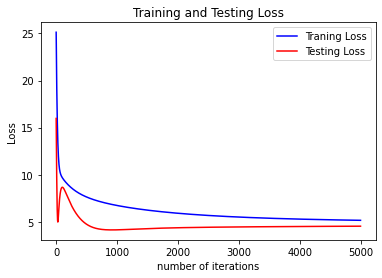

In [ ]:
# Plot the learning curve
import matplotlib.pyplot as plt

x_values = range(1,loss_history.shape[1]+1)
plt.plot(x_values, loss_history[0], 'b', label="Traning Loss")
plt.plot(x_values, loss_history[1], 'r', label="Testing Loss")
plt.title("Training and Testing Loss")
plt.xlabel("number of iterations")
plt.ylabel("Loss")
plt.legend()

plt.show()

## **Q7. Prediction using Linear Regression model:**

In this section, you will predict the housing price for the new data below (i.e., unknown to the model) using the optimal parameters `opt_theta` that you have computed in Q6. You will need to:

* predict housing price for the new test data using the optimal parameters computed in Q6; (2 marks)
* compute the RMSE between the predicted-y and actual-y values for this test data. (1 mark)

In [ ]:
# the test data below is already normalzied
new_dataset = np.asarray([[1.000,0.001,0.125,0.272,0.000,0.286,0.470,0.656,0.403,0.174,0.237,0.277,0.997,0.295,22.900],
[1.000,0.002,0.000,0.236,0.000,0.130,0.426,0.313,0.361,0.087,0.088,0.564,1.000,0.343,20.000],
[1.000,0.001,0.125,0.206,0.000,0.049,0.390,0.349,0.488,0.130,0.302,0.670,1.000,0.313,17.400],
[1.000,0.001,0.000,0.148,0.000,0.132,0.588,0.548,0.301,0.087,0.115,0.628,0.988,0.132,26.600],
[1.000,0.001,0.000,0.297,0.000,0.278,0.492,0.848,0.090,0.174,0.376,0.883,0.977,0.341,20.400],
[1.000,0.004,0.000,0.786,0.000,0.492,0.555,0.989,0.090,0.130,0.477,0.915,0.995,0.300,19.200],
[1.000,0.021,0.000,0.701,1.000,0.453,0.813,0.981,0.083,0.174,0.412,0.223,0.982,0.005,35.000],
[1.000,0.001,0.000,0.073,0.000,0.212,0.391,0.895,0.169,0.087,0.011,0.553,0.985,0.338,26.400],
[1.000,0.003,0.000,0.371,0.000,0.214,0.530,0.511,0.293,0.130,0.172,0.638,0.995,0.255,24.400],
[1.000,0.005,0.000,0.210,0.000,0.245,0.573,0.191,0.204,0.304,0.229,0.511,0.958,0.056,31.500],
[1.000,0.004,0.000,0.346,0.000,0.327,0.541,0.662,0.219,0.130,0.223,0.617,0.996,0.238,23.100],
[1.000,0.001,0.000,0.102,0.000,0.154,0.442,0.236,0.371,0.130,0.464,0.457,0.964,0.227,19.300],
[1.000,0.000,0.850,0.135,0.000,0.091,0.566,0.255,0.673,0.130,0.313,0.564,0.989,0.128,23.100],
[1.000,0.043,0.000,0.647,0.000,0.792,0.515,0.908,0.106,1.000,0.914,0.809,0.883,0.344,19.900],
[1.000,0.125,0.000,0.647,0.000,0.582,0.258,1.000,0.004,1.000,0.914,0.809,1.000,0.912,13.800],
[1.000,0.103,0.000,0.647,0.000,0.648,0.378,1.000,0.041,1.000,0.914,0.809,1.000,0.603,11.300],
[1.000,0.097,0.000,0.647,0.000,0.634,0.504,0.924,0.060,1.000,0.914,0.809,1.000,0.371,13.800],
[1.000,0.108,0.000,0.647,0.000,0.634,0.545,1.000,0.046,1.000,0.914,0.809,0.948,0.513,12.100],
[1.000,0.211,0.000,0.647,0.000,0.436,0.204,1.000,0.039,1.000,0.914,0.809,0.072,0.901,20.900],
[1.000,0.083,0.000,0.647,0.000,0.605,0.504,0.774,0.073,1.000,0.914,0.809,0.243,0.546,11.000]]
)

new_X = new_dataset[:,0:14]
new_y = new_dataset[:,14:15]

You will enter your code below:

5.335564546533


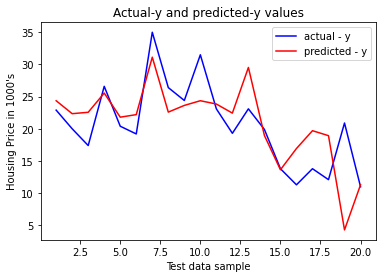

In [ ]:
# compute the predicted housing price for the new test data using the optimal parameters computed in Q6 (2 marks)
predicted_y = None
## start your code here
predicted_y = np.dot(new_X,opt_theta)


## end

# compute the RMSE loss between the predicted-y and actual-y values for this test data (1 mark)
rmse_loss = None
## Start your code here
rmse_loss = RMSEFunction(new_X, opt_theta, new_y)


## end
print(rmse_loss)
    
#plot the grpah showing the predicted-y values and the actual-y values
x_values = range(1,predicted_y.shape[0]+1)
plt.plot(x_values, new_y, 'b', label="actual - y")
plt.plot(x_values, predicted_y, 'r', label="predicted - y")
plt.title("Actual-y and predicted-y values")
plt.xlabel("Test data sample")
plt.ylabel("Housing Price in 1000's")
plt.legend()
plt.show()

Expected Output:

When you run the above code, you should get the graph as shown here:

`5.335564546532999`

![graph image here (LRGDgrph2.png)](https://drive.google.com/uc?export=view&id=16jCCxZe2nNhsDllafNwpbMd93cy-MSgv)

## **Q8. What did you learn from this assignment?**

In this question, you need to list out the difficulties and how you overcome them when doing the assignment. You can also talk about what you have learned and how do you think we should improve the assignment here. This section is graded. Please type the comments in the text cell below and list them in bullet points. (3 marks)

Please enter your comments here by double-clicking on this text cell:
* comment 1: The challenging part of the assignment was creating the gradient descent algorithm. The difficulty was in translating the math into code. For those who did not take linear algebra and/or coding before I think they may find this assignment extremely difficult. To finish the assignment, I had to do lots of debugging and had many print statement lying around to understand what the code is doing. Though I admit that I made a lot of careless mistakes as well which led to the fustration.

* comment 2: I find that the use of numpy very useful, this will help me in the future when I analyze data for other modules or work. Though sometimes I cannot memorize the exact numpy methods that I need for this specific function (as there are a lot), so I resort to traditional methods like indexing and looping, which I have done in this and past assignments. So it would be helpful to drop some hints on which numpy methods can be used to solve these questions. E.g qn2

* etc: From the gradient descent, I learned the inner workings of how a model is optimized. This will be useful for me in the future as a data science undergrad.





---


# End of your Assignment